<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Types-of-calculate" data-toc-modified-id="Using-the-scripting-interface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Types of calculate</a></span><ul class="toc-item"><li><span><a href="#Calculate-by-third-octave" data-toc-modified-id="Calculate-by-third-octave-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calculate by third octave</a></span></li><li><span><a href="#Calculate-by-time-samples" data-toc-modified-id="Calculate-by-time-samples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calculate by time samples</a></span></li></ul></li><li><span><a href="#Using-the-function-library" data-toc-modified-id="Using-the-function-library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the function library</a></span><ul class="toc-item"><li><span><a href="#Time-varying-signal" data-toc-modified-id="Time-varying-signal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time varying signal</a></span></li><li><span><a href="#Steady-signal" data-toc-modified-id="Steady-signal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Steady signal</a></span></li></ul></li></ul></div>


# How to compute the functions of sound level meter
# mirar esto //////////////////////////////////////////////////////////////////
This tutorial explains how to use MOSQITO to compute the functions of the sound level meter. Two approaches are possible: scripting interface and function library. The users who just need to compute SQ metrics should preferably use the scripting interface approach. The function library approach is dedicated to users who would like to integrate MOSQITO functions in another software for instance. ?????????????????????????????

## Types of calculate
### Calculate by third octave 
In this tutorial the calculations are made for each frequency band for which you want to know the result. Choose a frequency band and look at the values have this band in the differents samples. With this values (db) is calculate the frequency band functions of this sound level meter. Will return an array with as many values as frequency bands have been calculated, one result for each frequency band. This functions are recognized because they have the suffix "_3oct" written in the name (they do not have to be the third octave bands, they can be any band that you want to calculate).

An input array is needed,it is necessary that each line be the values of each frequency band of a sample. This is how one sample looks like. 

[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]


<ipython-input-2-b4fa577a4e68>:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (freq_standard, rotation = 75, fontsize = 9)


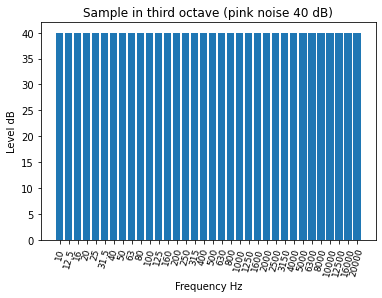

In [2]:
# Third party imports
import numpy as np
import matplotlib.pyplot as plt

#freq_standard = [10, 12.5, 16, 20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315, 400,500, 630, 800,
#                1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500, 16000,20000]
    
# Third octave frequencies (values of the x axis) 
freq_standard = ['10', '12.5', '16', '20', '25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
                 '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
                 '10000', '12500', '16000','20000']

# pink_noise 40.0 dB sample (values of the y axis)
# Sample with 34 values, one for each third octave band (you can calculate with more or less frequency bands)
spectrum_pink_first_sample = [
    #third octave  10 Hz
    40.0,
    #third octave  12.5 Hz
    40.0,
    #third octave  16 Hz
    40.0,
    #third octave  20 Hz
    40.0,
    #third octave  25 Hz
    40.0,
    #third octave  31.5 Hz
    40.0,
    #third octave  40 Hz
    40.0,
    #third octave  50 Hz
    40.0,
    #third octave  63 Hz
    40.0,
    #third octave  80 Hz
    40.0,
    #third octave  100 Hz
    40.0,
    #third octave  125 Hz
    40.0,
    #third octave  160 Hz
    40.0,
    #third octave  200 Hz
    40.0,
    #third octave  250 Hz
    40.0,
    #third octave  315 Hz
    40.0,
    #third octave  400 Hz
    40.0,
    #third octave  500 Hz
    40.0,
    #third octave  630 Hz
    40.0,
    #third octave  800 Hz
    40.0,
    #third octave  1000 Hz
    40.0,
    #third octave  1250Hz
    40.0,
    #third octave  1600 Hz
    40.0,
    #third octave  2000 Hz
    40.0,
    #third octave  2500 Hz
    40.0,
    #third octave  3150 Hz
    40.0,
    #third octave  4000 Hz
    40.0,
    #third octave  5000 Hz
    40.0,
    #third octave  6300 Hz
    40.0,
    #third octave  8000 Hz
    40.0,
    #third octave  10000 Hz
    40.0,
    #third octave  12500 Hz
    40.0,
    #third octave  16000 Hz
    40.0,
    #third octave  20000 Hz
    40.0,
    ]

# Print the sample
print(spectrum_pink_first_sample)

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Sample in third octave (pink noise 40 dB)')

# Bar graph is created
ax.bar (freq_standard, spectrum_pink_first_sample, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (freq_standard, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

The input array is the set of samples, each line is a sample. This is how the input array looks like. 

In [3]:
# Third party imports
import numpy as np

# pink_noise 40.0 dB samples
# first sample with 34 values, one for each third octave band (you can calculate with more or less frequency bands)
spectrum_pink_first_sample = [
    #third octave  10 Hz
    40.0,
    #third octave  12.5 Hz
    40.0,
    #third octave  16 Hz
    40.0,
    #third octave  20 Hz
    40.0,
    #third octave  25 Hz
    40.0,
    #third octave  31.5 Hz
    40.0,
    #third octave  40 Hz
    40.0,
    #third octave  50 Hz
    40.0,
    #third octave  63 Hz
    40.0,
    #third octave  80 Hz
    40.0,
    #third octave  100 Hz
    40.0,
    #third octave  125 Hz
    40.0,
    #third octave  160 Hz
    40.0,
    #third octave  200 Hz
    40.0,
    #third octave  250 Hz
    40.0,
    #third octave  315 Hz
    40.0,
    #third octave  400 Hz
    40.0,
    #third octave  500 Hz
    40.0,
    #third octave  630 Hz
    40.0,
    #third octave  800 Hz
    40.0,
    #third octave  1000 Hz
    40.0,
    #third octave  1250Hz
    40.0,
    #third octave  1600 Hz
    40.0,
    #third octave  2000 Hz
    40.0,
    #third octave  2500 Hz
    40.0,
    #third octave  3150 Hz
    40.0,
    #third octave  4000 Hz
    40.0,
    #third octave  5000 Hz
    40.0,
    #third octave  6300 Hz
    40.0,
    #third octave  8000 Hz
    40.0,
    #third octave  10000 Hz
    40.0,
    #third octave  12500 Hz
    40.0,
    #third octave  16000 Hz
    40.0,
    #third octave  20000 Hz
    40.0,
    ]

# second sample with 34 values, one for each third octave band (you can calculate with more or less frequency bands)
spectrum_pink_second_sample = [
    #third octave  10 Hz
    40.0,
    #third octave  12.5 Hz
    40.0,
    #third octave  16 Hz
    40.0,
    #third octave  20 Hz
    40.0,
    #third octave  25 Hz
    40.0,
    #third octave  31.5 Hz
    40.0,
    #third octave  40 Hz
    40.0,
    #third octave  50 Hz
    40.0,
    #third octave  63 Hz
    40.0,
    #third octave  80 Hz
    40.0,
    #third octave  100 Hz
    40.0,
    #third octave  125 Hz
    40.0,
    #third octave  160 Hz
    40.0,
    #third octave  200 Hz
    40.0,
    #third octave  250 Hz
    40.0,
    #third octave  315 Hz
    40.0,
    #third octave  400 Hz
    40.0,
    #third octave  500 Hz
    40.0,
    #third octave  630 Hz
    40.0,
    #third octave  800 Hz
    40.0,
    #third octave  1000 Hz
    40.0,
    #third octave  1250Hz
    40.0,
    #third octave  1600 Hz
    40.0,
    #third octave  2000 Hz
    40.0,
    #third octave  2500 Hz
    40.0,
    #third octave  3150 Hz
    40.0,
    #third octave  4000 Hz
    40.0,
    #third octave  5000 Hz
    40.0,
    #third octave  6300 Hz
    40.0,
    #third octave  8000 Hz
    40.0,
    #third octave  10000 Hz
    40.0,
    #third octave  12500 Hz
    40.0,
    #third octave  16000 Hz
    40.0,
    #third octave  20000 Hz
    40.0,
    ]

# third sample with 34 values, one for each third octave band (you can calculate with more or less frequency bands)
spectrum_pink_third_sample = [
    #third octave  10 Hz
    40.0,
    #third octave  12.5 Hz
    40.0,
    #third octave  16 Hz
    40.0,
    #third octave  20 Hz
    40.0,
    #third octave  25 Hz
    40.0,
    #third octave  31.5 Hz
    40.0,
    #third octave  40 Hz
    40.0,
    #third octave  50 Hz
    40.0,
    #third octave  63 Hz
    40.0,
    #third octave  80 Hz
    40.0,
    #third octave  100 Hz
    40.0,
    #third octave  125 Hz
    40.0,
    #third octave  160 Hz
    40.0,
    #third octave  200 Hz
    40.0,
    #third octave  250 Hz
    40.0,
    #third octave  315 Hz
    40.0,
    #third octave  400 Hz
    40.0,
    #third octave  500 Hz
    40.0,
    #third octave  630 Hz
    40.0,
    #third octave  800 Hz
    40.0,
    #third octave  1000 Hz
    40.0,
    #third octave  1250Hz
    40.0,
    #third octave  1600 Hz
    40.0,
    #third octave  2000 Hz
    40.0,
    #third octave  2500 Hz
    40.0,
    #third octave  3150 Hz
    40.0,
    #third octave  4000 Hz
    40.0,
    #third octave  5000 Hz
    40.0,
    #third octave  6300 Hz
    40.0,
    #third octave  8000 Hz
    40.0,
    #third octave  10000 Hz
    40.0,
    #third octave  12500 Hz
    40.0,
    #third octave  16000 Hz
    40.0,
    #third octave  20000 Hz
    40.0,
    ]

# pink noise signal (gather all samples)
pink_noise_samples = [spectrum_pink_first_sample, spectrum_pink_second_sample, spectrum_pink_third_sample]
# pink noise signal array (input array)
pink_noise_signal = np.array(pink_noise_samples)
# print the input array for the functions "_3oct"
print(pink_noise_signal)

[[40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.
  40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.
  40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.
  40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40. 40.]]


### Calculate by time samples
In this tutorial for the calculations all temporary samples collected are used. Each sample is collected in a time and has its value. With this values (db) is calculate the signal functions of this sound level meter. Will return an array with the value have been calculated, the calculations are made for all samples so it is only a representative or generic value for the input signal.

An input array is needed, is necessary that all the values are in the same line of the array. This is how looks like. 

[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0]
[0.         0.00138889 0.00277778 0.00416667 0.00555556 0.00694444
 0.00833333 0.00972222 0.01111111 0.0125    ]


<ipython-input-12-b8ed498fb20d>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (signal_time, rotation = 75, fontsize = 9)


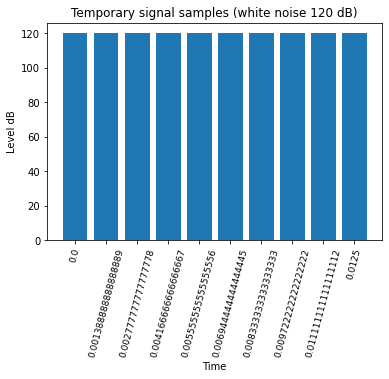

In [12]:
# Third party imports
import numpy as np

# Local imports
from mosqito.functions.shared.level import comp_level

# It is 100 time samples of a white noise in Pa (more or less temporary samples can be used). 
white_noise_time = np.array(
    [
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0,
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0,
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0,
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0,
        20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0,
    ]
)

# Created a signal with the time samples and a function of mosqito. The function transforms the pascals into dB 
# and takes the temporal samples. 
fs = 8000
nb_points = 10
data = comp_level(white_noise_time, fs, nb_points)
signal_db = data['values']
signal_time = data['time']

# Print the values and the time of each sample. One array for the values and other for the time.
print(signal_db)
print(signal_time)

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Time')
# Graphic Title
plt.title ('Temporary signal samples (white noise 120 dB)')

# Bar graph is created
time = ['0', '0.00013889', '0.00027778', '0.00041667', '0.00055556', '0.00069444', '0.00083333', '0.00097222',
        '0.00111111', '0.00125'] 
ax.bar (time, signal_db, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (signal_time, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

This is how the input array for these functions finally has to look like. It is just an array with the values in dB of the level of each sample.

In [13]:
signal_time_samples = np.array(signal_db)
print(signal_time_samples)

[120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]


## Using the function library
### Time varying signal
The commands below shows how to compute the loudness of a time varying signal by directly using the functions from MOSQITO. 

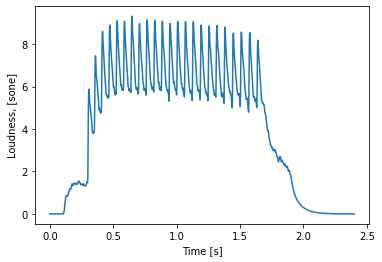

In [11]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

# Import MOSQITO functions
from mosqito.functions.shared.load import load
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness

# Define path to the .wav file
# To be replaced by your own path
path = "../validations/loudness_zwicker/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav"

# Load signal 
signal, fs = load(
    False,
    path, 
    calib = 2 * 2**0.5 
)

# Loudness calculation
loudness = comp_loudness(False, signal, fs, field_type = 'free')

# Plot
N = loudness['values']
time = np.linspace(0,0.002*(N.size - 1),N.size)
plt.plot(time, N)
plt.xlabel("Time [s]")
plt.ylabel("Loudness, [sone]")
plt.show()

### Steady signal

The syntax is very similar. The specific loudness is plotted over the Bark frequency scale.

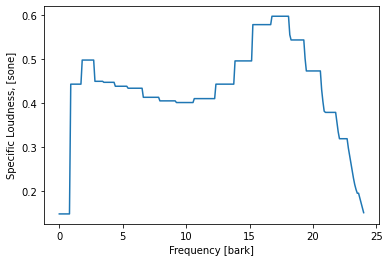

In [12]:
# Define path to the .wav file
# To be replaced by your own path
path = "../validations/loudness_zwicker/data/ISO_532-1/Test signal 5 (pinknoise 60 dB).wav"


# Load signal 
signal, fs = load(
    True,
    path, 
    calib = 2 * 2**0.5 
)

# Loudness calculation
loudness = comp_loudness(True, signal, fs, field_type = 'free')

# Plot
N = loudness['specific values']
bark_scale = np.linspace(0,24,num=len(N))
plt.plot(bark_scale, N)
plt.xlabel("Frequency [bark]")
plt.ylabel("Specific Loudness, [sone]")
plt.show()